In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# Part 1

In [2]:
table = pd.read_csv("gap.tsv", sep='\t')
table

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


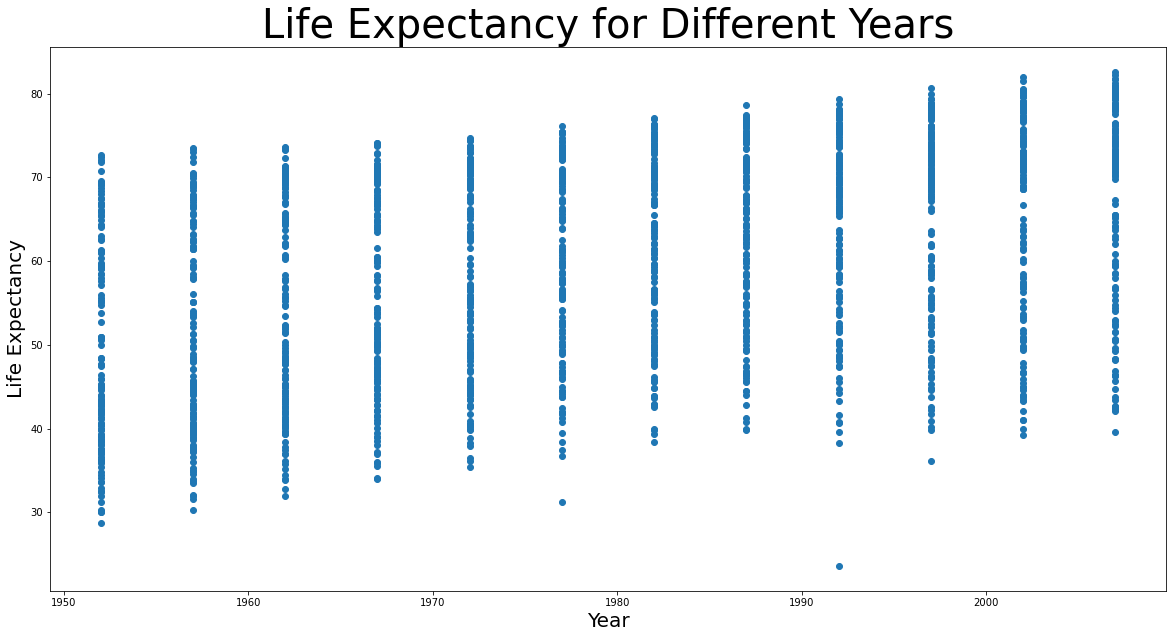

In [3]:
# Exercise 1
plot_table_1= table[['year','lifeExp']]
plt.figure(figsize=(20,10))
plt.scatter(plot_table_1['year'],plot_table_1['lifeExp'])
plt.xlabel("Year",fontsize=20)
plt.ylabel("Life Expectancy",fontsize=20)
plt.title("Life Expectancy for Different Years", fontsize=40)
plt.show()

## Question 1
It seems the life expectancy generally increases across time. I think the trend is linear.

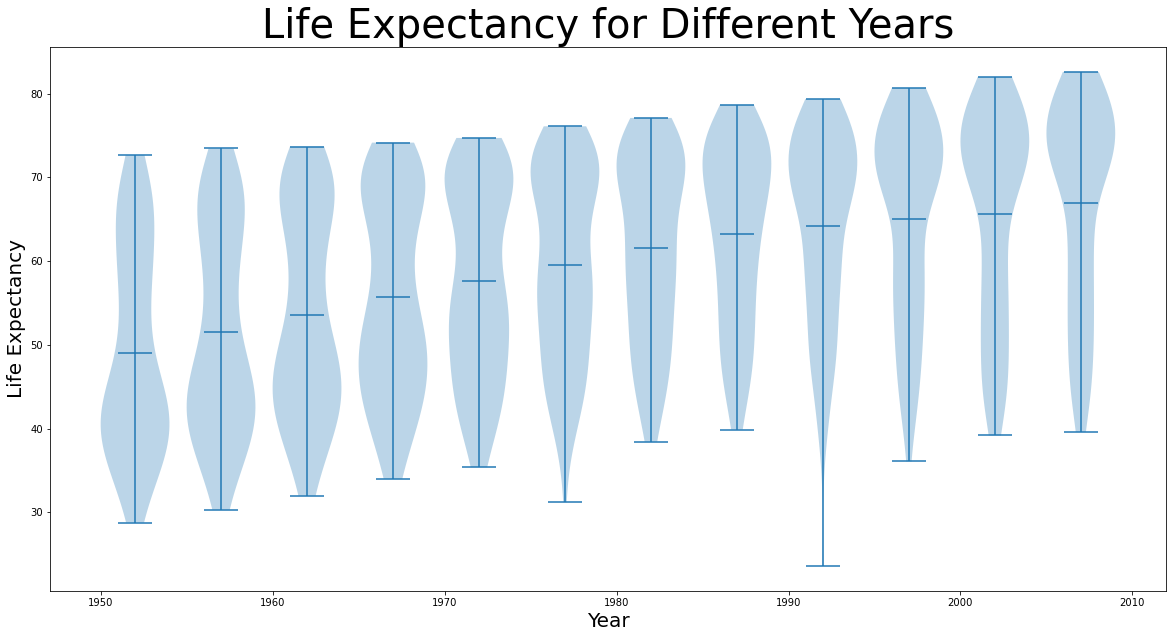

In [4]:
life_exp_per_year={}
for i, row in plot_table_1.iterrows():
    year=row['year']
    if year in life_exp_per_year:
        life_exp_per_year[year].append(row['lifeExp'])
    else:
        life_exp_per_year[year]=[row['lifeExp']]
life_exp_per_year
ploting_list=[]
years=[]
for key,value in life_exp_per_year.items():
    ploting_list.append(value)
    years.append(key)
plt.figure(figsize=(20,10))    
plt.violinplot(ploting_list,years,widths=4,showmeans=True)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Life Expectancy",fontsize=20)
plt.title("Life Expectancy for Different Years", fontsize=40)
plt.show()

## Question 2

Skew:

For year 1952 - 1962, the distribution of life expectancy across countries are skewed to the higher end.

For year 1967 - 2007, the distribution of life expectancy across countries are skewed to the lower end.

Unimodel:

For year 1952 - 1977, the distribution of life expectancy across countries are not unimodeled.

For year 1982 - 2007, the distribution of life expectancy across countries are unimodeled.

Symmetric:

For year 1967 and 1972, the distribution of life expectancy across countries are symmetric.

For the other years, the distribution of life expectancy across countries are not symmetric.



## Question 3
I will not reject the null hypothesis that there is no relation between year and lifeExp

## Question 4
The violin plot for the residuals from a linear model will be similar to the violin plot of year and lifeExp except that the y-axis should be changed and the "violins" may need to be moved a little above or below.

## Question 5

The linear regression model assumes the relation between year and lifeExp is linear

The linear regression model assumes the noise are small and symmetric about 0.

According to the assumptions, the violin plot of residual should look like normal distributions with mean = 0

However, the previous problems contradict with the assumption of the violin plot and we should not use such a simple linear regression model.

In [5]:
reg = LinearRegression().fit(plot_table_1['year'].values.reshape(-1,1), plot_table_1['lifeExp'])
coefficient=reg.coef_
intercept = reg.intercept_
print(coefficient)
print(intercept)

# Thus, the line is lifeExp = -585.6521874415448 + 0.32590383 * year

[0.32590383]
-585.6521874415448


Thus, the line is lifeExp = -585.6521874415448 + 0.32590383 * year

## Question 6

On average, the life expectancy increases 0.32590383 year(s) every year around the world

## Question 7
We cannot reject the null hypothesis so far since we have not calculated the p-value.

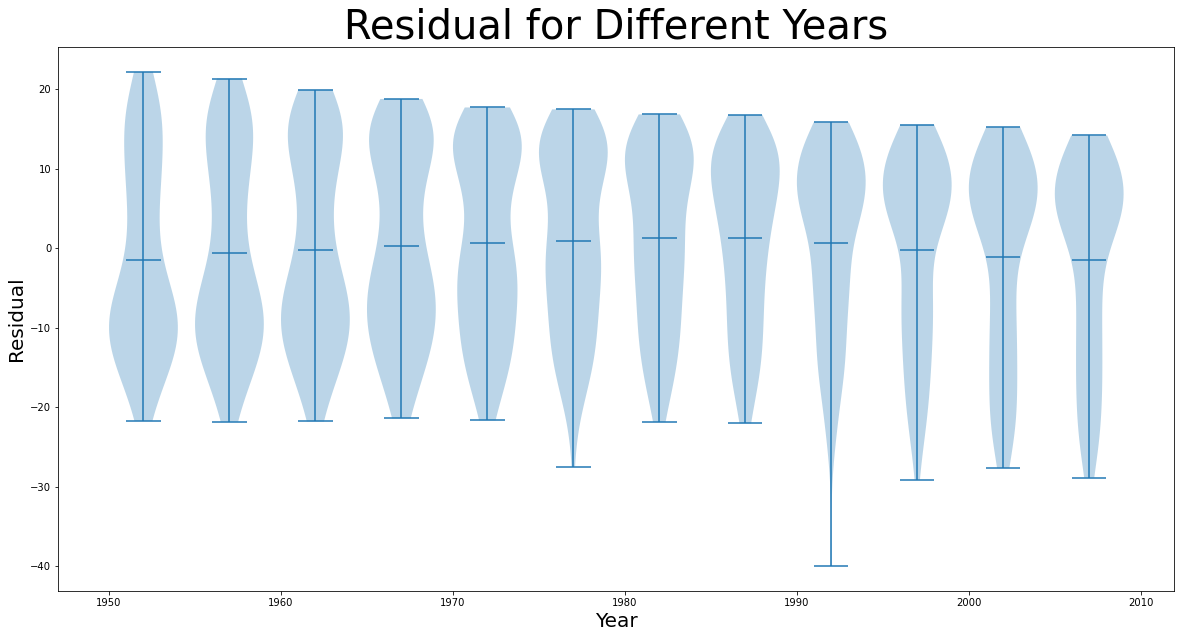

In [6]:
# Exercise 3:
plot_table_2 = plot_table_1.copy()
plot_table_2['residual'] = pd.Series(np.nan, index=plot_table_2.index)
for i, row in plot_table_2.iterrows():
    year = row['year']
    realLifeExp = row['lifeExp']
    residual = realLifeExp - reg.predict([[year]])[0]
    plot_table_2.loc[i,'residual']=residual

    
residual_per_year={}
for i, row in plot_table_2.iterrows():
    year=row['year']
    if year in residual_per_year:
        residual_per_year[year].append(row['residual'])
    else:
        residual_per_year[year]=[row['residual']]
residual_per_year
ploting_list=[]
years=[]
for key,value in residual_per_year.items():
    ploting_list.append(value)
    years.append(key)
plt.figure(figsize=(20,10))    
plt.violinplot(ploting_list,years,widths=4,showmeans=True)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Residual",fontsize=20)
plt.title("Residual for Different Years", fontsize=40)
plt.show()

## Question 8
The above plot matches my expectation in Question 4

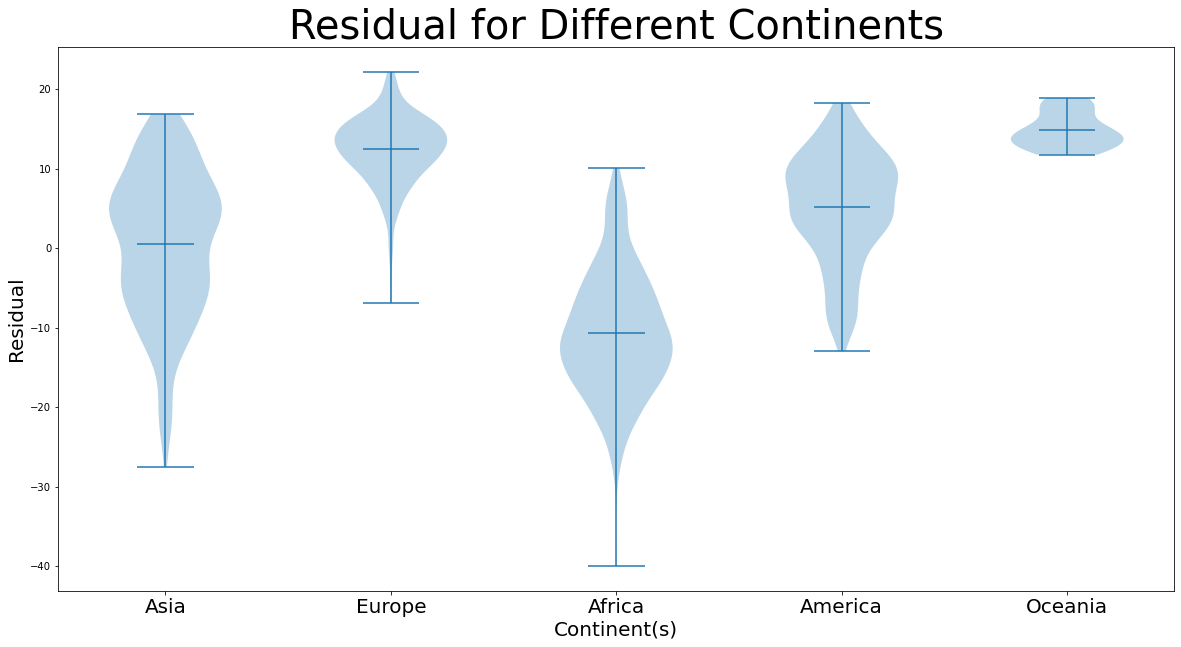

In [7]:
# Exercise 4
plot_table_3 = table[['continent','year','lifeExp']].copy()
plot_table_3['residual'] = pd.Series(np.nan, index=plot_table_3.index)
for i, row in plot_table_3.iterrows():
    year = row['year']
    realLifeExp = row['lifeExp']
    residual = realLifeExp - reg.predict([[year]])[0]
    plot_table_3.loc[i,'residual']=residual

residual_per_continent={}
for i, row in plot_table_3.iterrows():
    continent=row['continent']
    if continent in residual_per_continent:
        residual_per_continent[continent].append(row['residual'])
    else:
        residual_per_continent[continent]=[row['residual']]

ploting_list=[]
continents=[]
for key,value in residual_per_continent.items():
    ploting_list.append(value)
    continents.append(key)

    
plt.figure(figsize=(20,10))    
plt.violinplot(ploting_list,widths=0.5,showmeans=True)
plt.xlabel("Continent(s)",fontsize=20)
plt.ylabel("Residual",fontsize=20)
plt.title("Residual for Different Continents", fontsize=40)
positions=[1,2,3,4,5]
labels=['Asia','Europe','Africa','America','Oceania']
plt.xticks(positions, labels,fontsize=20)
plt.show()


# print(continents[0])
# plt.figure(figsize=(20,10))    
# plt.violinplot(ploting_list[0],widths=4,showmeans=True)
# plt.xlabel("Continent(s)",fontsize=20)
# plt.ylabel("Residual",fontsize=20)
# plt.title("Residual for Asia", fontsize=40)
# plt.show()

# print(continents[1])
# plt.figure(figsize=(20,10))    
# plt.violinplot(ploting_list[1],widths=4,showmeans=True)
# plt.xlabel("Continent(s)",fontsize=20)
# plt.ylabel("Residual",fontsize=20)
# plt.title("Residual for Europe", fontsize=40)
# plt.show()

# print(continents[2])
# plt.figure(figsize=(20,10))    
# plt.violinplot(ploting_list[2],widths=4,showmeans=True)
# plt.xlabel("Continent(s)",fontsize=20)
# plt.ylabel("Residual",fontsize=20)
# plt.title("Residual for Africa", fontsize=40)
# plt.show()

# print(continents[3])
# plt.figure(figsize=(20,10))    
# plt.violinplot(ploting_list[3],widths=4,showmeans=True)
# plt.xlabel("Continent(s)",fontsize=20)
# plt.ylabel("Residual",fontsize=20)
# plt.title("Residual for Americas", fontsize=40)
# plt.show()

# print(continents[4])
# plt.figure(figsize=(20,10))    
# plt.violinplot(ploting_list[4],widths=4,showmeans=True)
# plt.xlabel("Continent(s)",fontsize=20)
# plt.ylabel("Residual",fontsize=20)
# plt.title("Residual for Oceania", fontsize=40)
# plt.show()


## Question 9

There is a dependence between residual and continent. For example, residuals for african countries are mostly negative while the residuals for oceanian countries are positive.

It suggests we might need to do a regression for each continent.

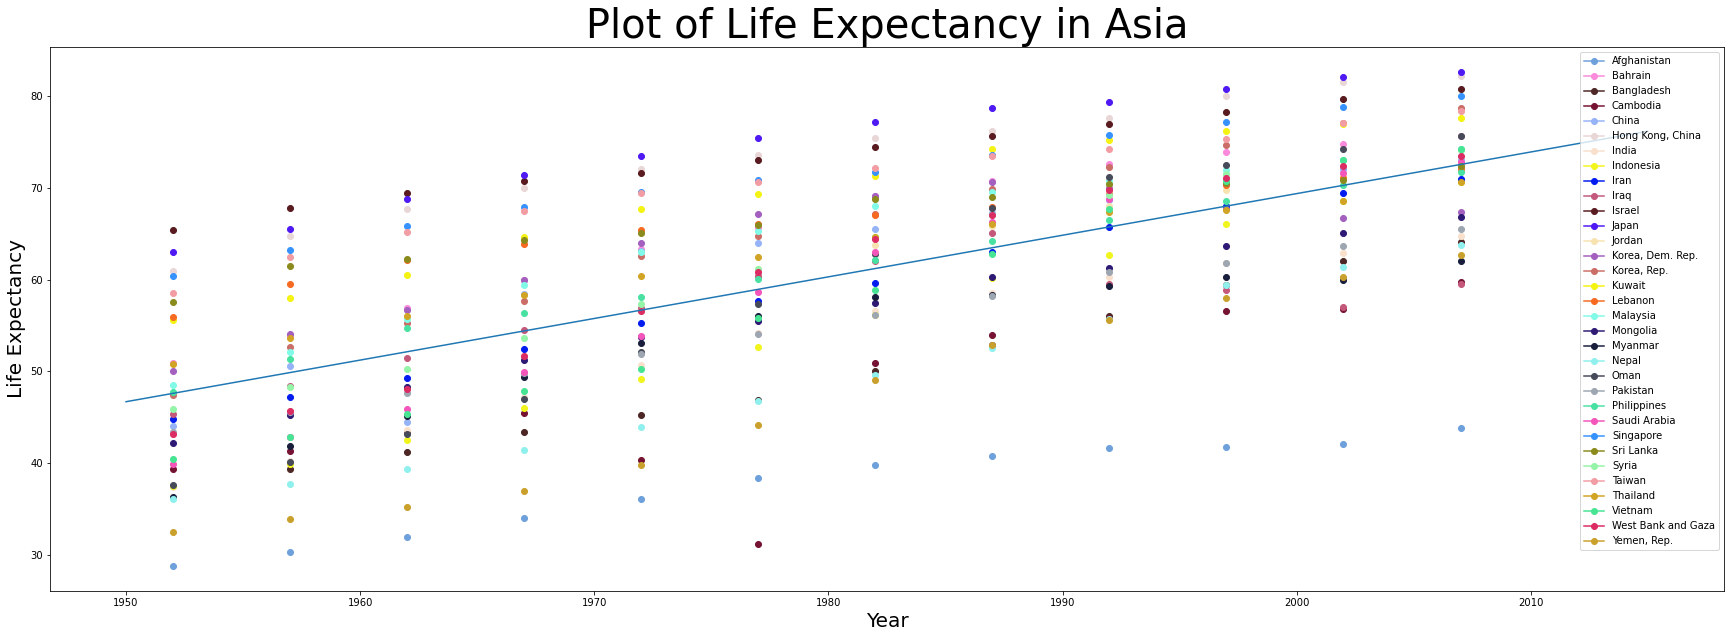

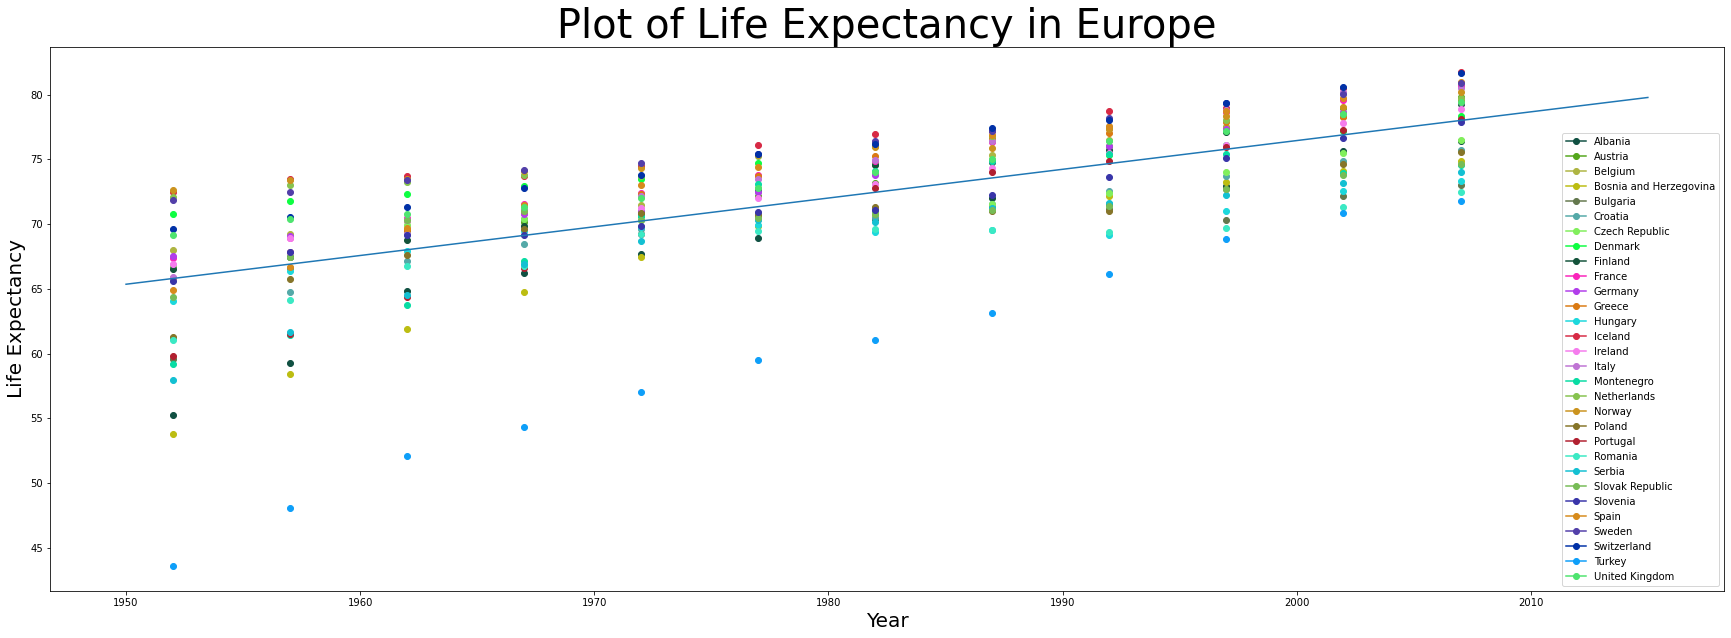

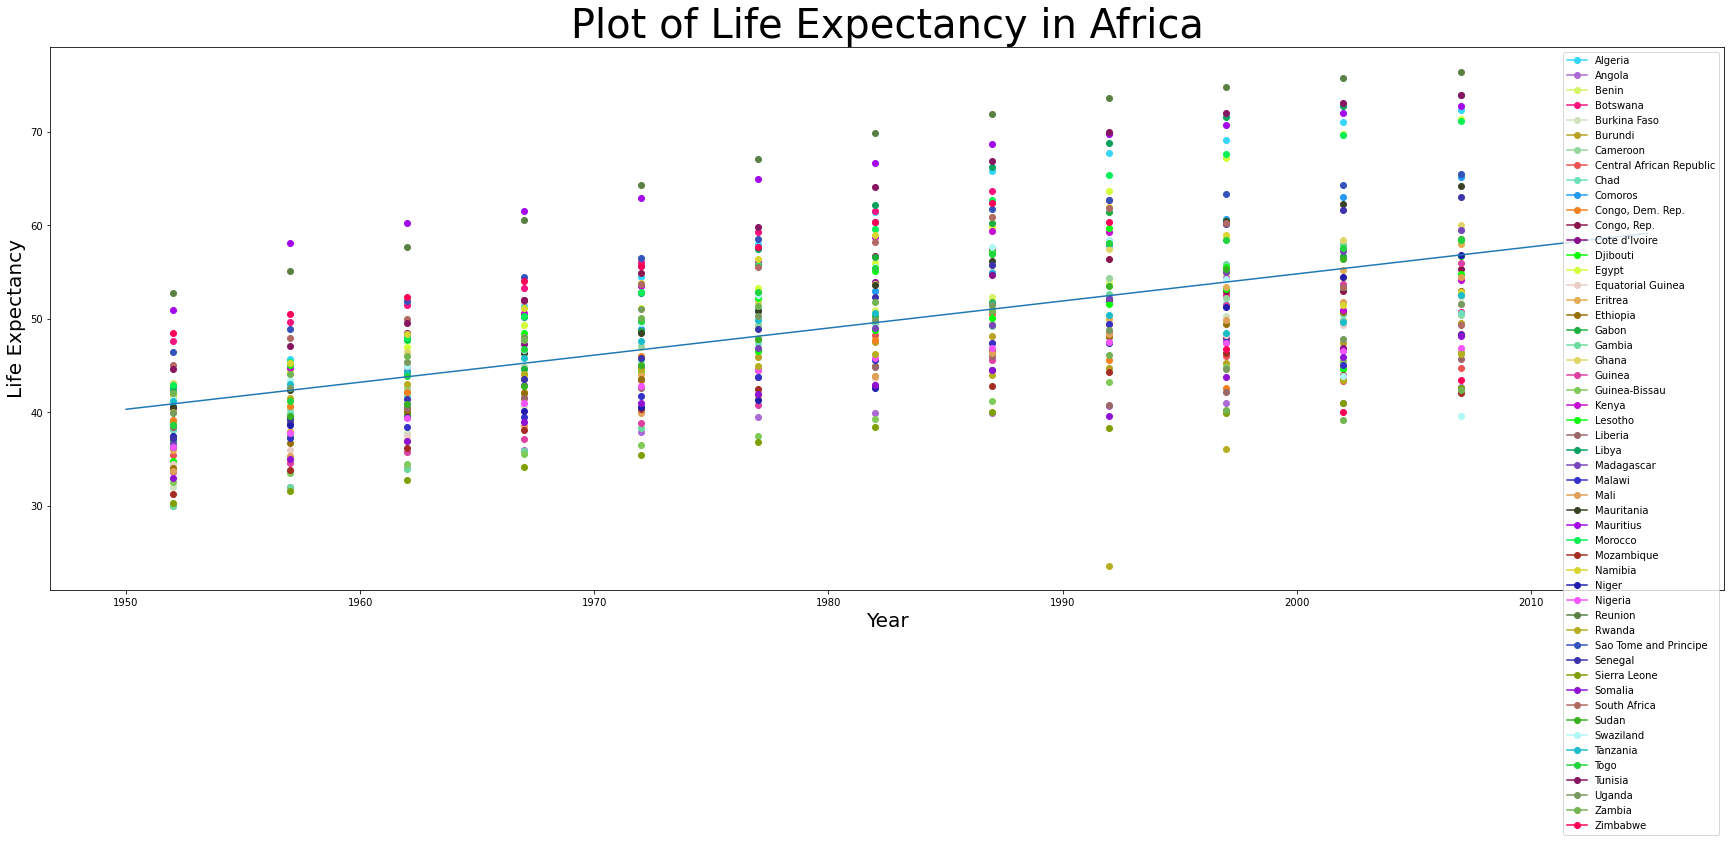

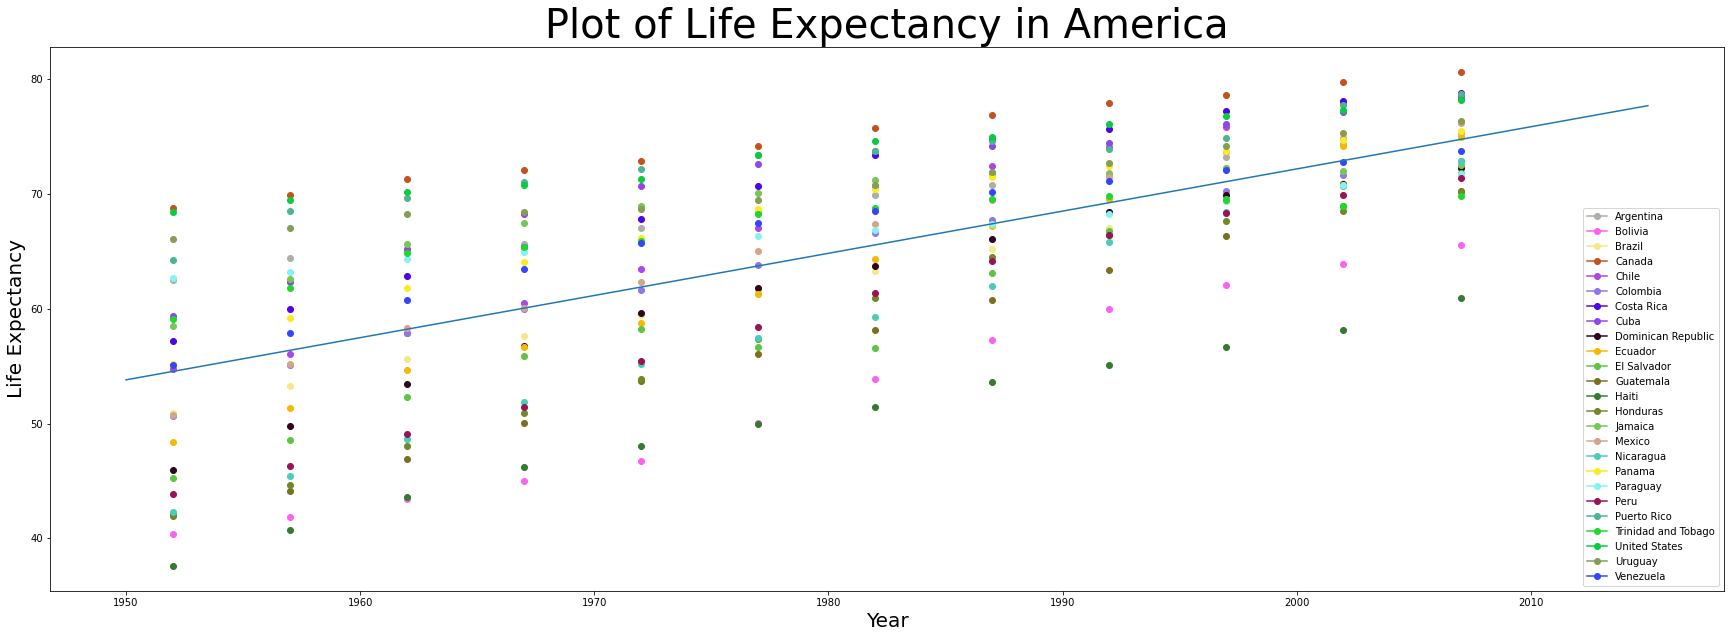

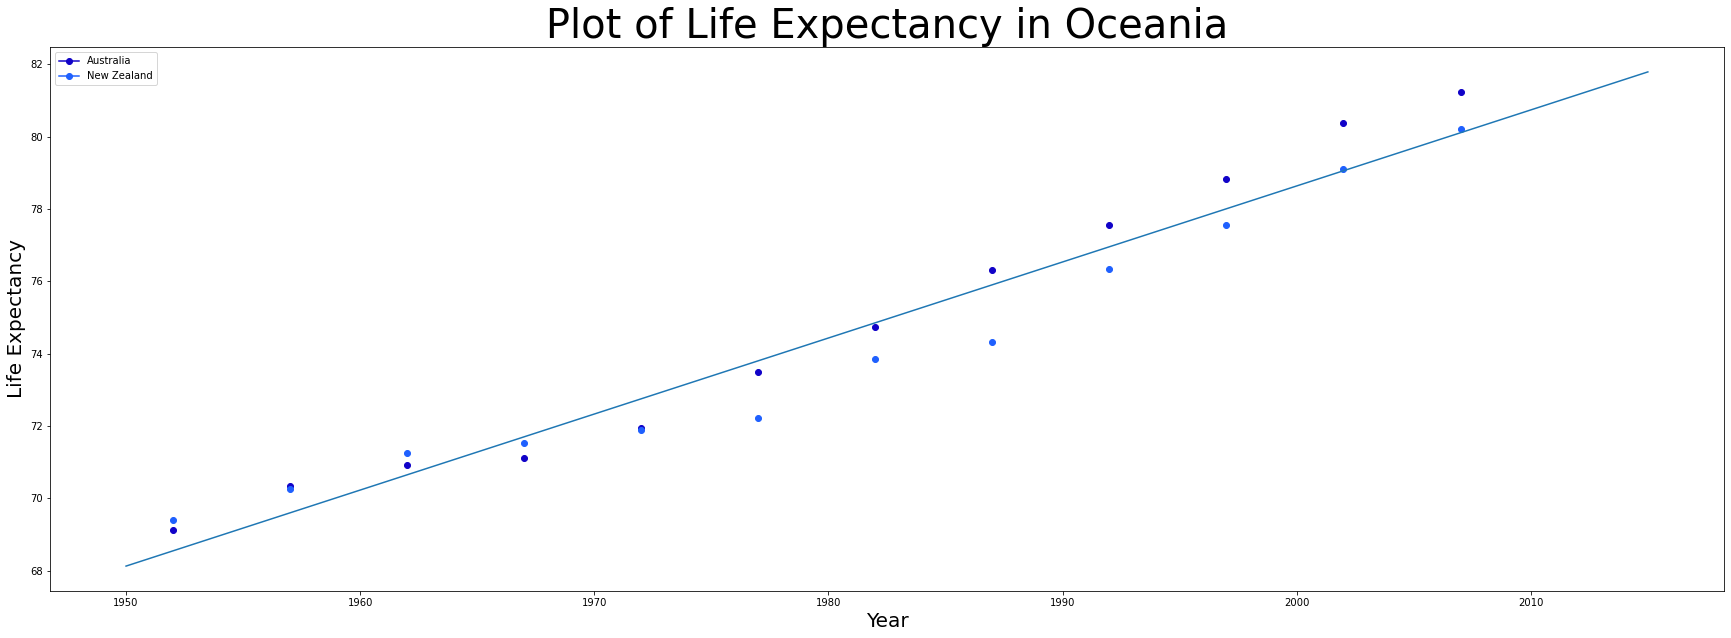

In [8]:
# Exercise 5
plot_table_4 = table[['continent','year','lifeExp','country']].copy()
grouped=plot_table_4.groupby('continent')
group_asia = grouped.get_group('Asia')
group_americas = grouped.get_group('Americas')
group_europe = grouped.get_group('Europe')
group_africa = grouped.get_group('Africa')
group_oceania = grouped.get_group('Oceania')

group_asia
dict_country={}
plt.figure(figsize=(30,10))
for i, row in group_asia.iterrows():
    country = row['country']
    
    if country in dict_country:
        plt.plot(row['year'],row['lifeExp'],marker='o',color=dict_country[country])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['year'],row['lifeExp'],marker='o',label=row['country'],color=a)
        dict_country[country]=a

        
line=np.polyfit(group_asia['year'],group_asia['lifeExp'],1)   
p = np.poly1d(line)
xp=np.linspace(1950, 2015, 2)
yp=p(xp)
plt.plot(xp,yp)
plt.legend()
plt.xlabel("Year",fontsize=20)
plt.ylabel("Life Expectancy",fontsize=20)
plt.title("Plot of Life Expectancy in Asia", fontsize=40)
plt.show()

group_europe
dict_country={}
plt.figure(figsize=(30,10))
for i, row in group_europe.iterrows():
    country = row['country']
    
    if country in dict_country:
        plt.plot(row['year'],row['lifeExp'],marker='o',color=dict_country[country])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['year'],row['lifeExp'],marker='o',label=row['country'],color=a)
        dict_country[country]=a

        
line=np.polyfit(group_europe['year'],group_europe['lifeExp'],1)   
p = np.poly1d(line)
xp=np.linspace(1950, 2015, 2)
yp=p(xp)
plt.plot(xp,yp)
plt.legend()
plt.xlabel("Year",fontsize=20)
plt.ylabel("Life Expectancy",fontsize=20)
plt.title("Plot of Life Expectancy in Europe", fontsize=40)
plt.show()


group_africa

dict_country={}
plt.figure(figsize=(30,10))
for i, row in group_africa.iterrows():
    country = row['country']
    
    if country in dict_country:
        plt.plot(row['year'],row['lifeExp'],marker='o',color=dict_country[country])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['year'],row['lifeExp'],marker='o',label=row['country'],color=a)
        dict_country[country]=a

        
line=np.polyfit(group_africa['year'],group_africa['lifeExp'],1)   
p = np.poly1d(line)
xp=np.linspace(1950, 2015, 2)
yp=p(xp)
plt.plot(xp,yp)
plt.legend()
plt.xlabel("Year",fontsize=20)
plt.ylabel("Life Expectancy",fontsize=20)
plt.title("Plot of Life Expectancy in Africa", fontsize=40)
plt.show()



group_americas

dict_country={}
plt.figure(figsize=(30,10))
for i, row in group_americas.iterrows():
    country = row['country']
    
    if country in dict_country:
        plt.plot(row['year'],row['lifeExp'],marker='o',color=dict_country[country])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['year'],row['lifeExp'],marker='o',label=row['country'],color=a)
        dict_country[country]=a

        
line=np.polyfit(group_americas['year'],group_americas['lifeExp'],1)   
p = np.poly1d(line)
xp=np.linspace(1950, 2015, 2)
yp=p(xp)
plt.plot(xp,yp)
plt.legend()
plt.xlabel("Year",fontsize=20)
plt.ylabel("Life Expectancy",fontsize=20)
plt.title("Plot of Life Expectancy in America", fontsize=40)
plt.show()


group_oceania

dict_country={}
plt.figure(figsize=(30,10))
for i, row in group_oceania.iterrows():
    country = row['country']
    
    if country in dict_country:
        plt.plot(row['year'],row['lifeExp'],marker='o',color=dict_country[country])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['year'],row['lifeExp'],marker='o',label=row['country'],color=a)
        dict_country[country]=a

        
line=np.polyfit(group_oceania['year'],group_oceania['lifeExp'],1)   
p = np.poly1d(line)
xp=np.linspace(1950, 2015, 2)
yp=p(xp)
plt.plot(xp,yp)
plt.legend()
plt.xlabel("Year",fontsize=20)
plt.ylabel("Life Expectancy",fontsize=20)
plt.title("Plot of Life Expectancy in Oceania", fontsize=40)
plt.show()



## Question 10

Based on the plot, I think the regression model should include an interaction term for continent and year since we can see that the linear regression equations on different continents are significantly different and if we make a linear regression only on year and lifeExp, the residuals are related to the continents.

In [9]:
# Exercise 6
temp_table = table[['continent','year','lifeExp','country']].copy()
temp_table['is_Asia'] = pd.Series(0, index=temp_table.index)
temp_table['is_Europe'] = pd.Series(0, index=temp_table.index)
temp_table['is_Africa'] = pd.Series(0, index=temp_table.index)
temp_table['is_Americas'] = pd.Series(0, index=temp_table.index)
temp_table['is_Oceania'] = pd.Series(0, index=temp_table.index)
temp_table['year_Asia'] = pd.Series(0, index=temp_table.index)
temp_table['year_Europe'] = pd.Series(0, index=temp_table.index)
temp_table['year_Africa'] = pd.Series(0, index=temp_table.index)
temp_table['year_Americas'] = pd.Series(0, index=temp_table.index)
temp_table['year_Oceania'] = pd.Series(0, index=temp_table.index)
temp_table

for i, row in temp_table.iterrows():
    year = row['year']
    continent = row['continent']
    
    if continent == 'Asia':
        temp_table.loc[i,'is_Asia']=1
        temp_table.loc[i,'year_Asia']=year
    elif continent == 'Europe':
        temp_table.loc[i,'is_Europe']=1
        temp_table.loc[i,'year_Europe']=year
    elif continent == 'Africa':
        temp_table.loc[i,'is_Africa']=1
        temp_table.loc[i,'year_Africa']=year
    elif continent == 'Americas':
        temp_table.loc[i,'is_Americas']=1
        temp_table.loc[i,'year_Americas']=year
    elif continent == 'Oceania':
        temp_table.loc[i,'is_Oceania'] = 1
        temp_table.loc[i,'year_Oceania']=year
temp_table

# for i,row in temp_table.iterrows():
#     if row['is_Asia']==0 and row['is_Europe']==0 and row['is_Africa']==0 and row['is_Americas']==0 and row['is_Oceania']==0:
#         print(row)



continent_and_year_matrix = temp_table[['year','lifeExp','country','is_Asia','is_Europe','is_Africa','is_Americas','is_Oceania','year_Asia','year_Europe','year_Africa','year_Americas','year_Oceania']]


# reg2 = LinearRegression().fit(continent_and_year_matrix[['year','is_Europe','is_Africa','is_Americas','is_Oceania','year_Asia','year_Europe','year_Africa','year_Americas','year_Oceania']], continent_and_year_matrix['lifeExp'])
# coefficient=reg2.coef_
# intercept = reg2.intercept_
# print(coefficient)
# print(intercept)

import statsmodels.api as sm

# Note that I drop "is_Asia" and "year_Asia"
X2=continent_and_year_matrix[['year','is_Europe','is_Africa','is_Americas','is_Oceania','year_Europe','year_Africa','year_Americas','year_Oceania']]
x3 = sm.add_constant(X2)
y= continent_and_year_matrix['lifeExp']
est = sm.OLS(y, x3)
results = est.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:07:04   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -836.8909     41.379    -20.225      0.000    -918.050    -755.732
year              0.4531      0.021     21.678      0.000       0.412       0.494
is_Europe       469.4799     59.963      7.829      0.000     351.870     587.090
is_Africa       312.6330     52.904      5.909      0.000     208.870     416.396
is_Americas     173.7846     63.026      2.757      0.006      50.167     297.402
is_Oceania      494.9829    173.100      2.860      0.004     155.471     834.494
year_Europe      -0.2312      0.030     -7.632      0.000      -0.291      -0.172
year_Africa      -0.1636      0.027     -6.121      0.000      -0.216      -0.111
year_Americas    -0.0855      0.032     -2.685      0.007      -0.148      -0.023
year_Oceania     -0.2429      0.087     -2.777      0.006      -0.414      -0.071
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 11

From the above table, we find the p-value for all of the estimation parameters are less than 0.05. Thus, all of the coefficients and the intercept are significantly different from zero.

## Question 12

From the OLS Regression Result above

The life expectancy increases 0.4531 each year in Asia.

The life expectancy increases 0.4531-0.2312 = 0.2219 each year in Europe.

The life expectancy increases 0.4531-0.1636 = 0.2895 each year in Africa.

The life expectancy increases 0.4531-0.0855 = 0.3676 each year in Americas.

The life expectancy increases 0.4531-0.2429 = 0.2102 each year in Oceania.

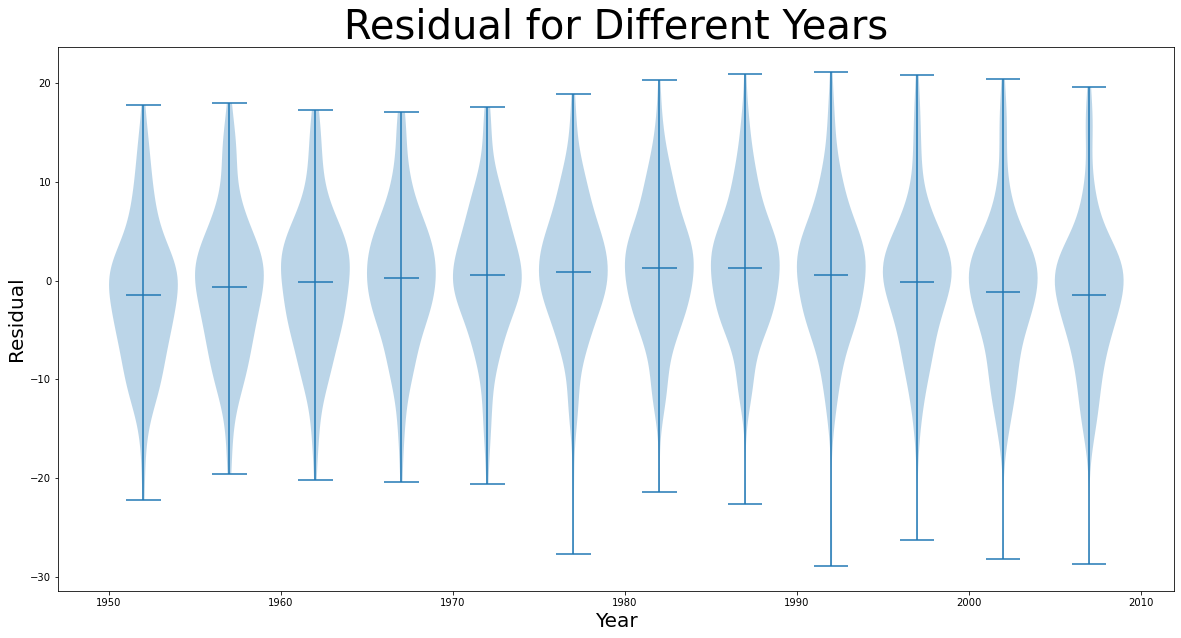

In [10]:
# Exercise 7
temp_table['prediction'] = pd.Series(0, index=temp_table.index)
temp_table['prediction'] = results.predict()
temp_table['residuals'] = pd.Series(0, index=temp_table.index)


for i, row in temp_table.iterrows():
    
    residual = row['lifeExp']-row['prediction']
    temp_table.loc[i,'residuals']=residual




residual_per_year={}
for i, row in temp_table.iterrows():
    year=row['year']
    if year in residual_per_year:
        residual_per_year[year].append(row['residuals'])
    else:
        residual_per_year[year]=[row['residuals']]
residual_per_year
ploting_list=[]
years=[]
for key,value in residual_per_year.items():
    ploting_list.append(value)
    years.append(key)
plt.figure(figsize=(20,10))    
plt.violinplot(ploting_list,years,widths=4,showmeans=True)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Residual",fontsize=20)
plt.title("Residual for Different Years", fontsize=40)
plt.show()

It matches much better than the former regression without interaction model. As we can see, most of the mean of the residuals are very close to zero, and the distribution for residuals each year seems to be normal and unimodel.

# Part 2

## Problem 1 

In [11]:
# These are functions copied from the make-up notebook
def sum_of_squares(v):
    return np.sum([i * i for i in v])

def estimate_partial(f, v, i, h):
    new_v = [val + (h if d == i else 0) for d, val in enumerate(v)]
    
    return (f(new_v) - f(v)) / h

def estimate_gradient(f, v, h):
    return [estimate_partial(f,v,i,h) for i in range(len(v))]

def single_step(vec, grad, ss):
    # multiply our gradient by the scalar step-size
    step = np.multiply(grad, ss)
    # add the resulting step vector to our input vector
    return vec + step

In [12]:
# This function takes a coefficient vector, and return a regression function with the input coefficients
def get_new_reg_func_linear(coefs):
    def new_reg_func(X):
        result = coefs[0]
        for i in range(0,len(X)):
            result=result+X[i]*coefs[i+1]
        return result
    return new_reg_func

# This function takes the training sample and returns a function. The return function will take a coefficient array, and return the corresponding lost function value.
def lost_function_for_linear(X,y):
    def lost_function(reg_coefs):
        f = get_new_reg_func_linear(reg_coefs)
        sum=0
        for i in range(0,len(X)):
            sum = sum+(f(X[i])-y[i])**2
        return sum
    return lost_function



This is the final gradient_descent function for multiple linear model

X is independent variable, y is dependent variable, coef is the initial intercept and coefficient

The function stops when the change of coef is less than tolerance or the iteration steps exceed iter_bound

In [13]:


def gradient_decent_for_multiple_linear(X,y,coef,tolerance,iter_bound):
    for i in range(0,iter_bound):
        lost_function = lost_function_for_linear(X,y)
        estimate_g = estimate_gradient(lost_function, coef, 0.001)
        temp = coef
        coef = single_step(coef,estimate_g,-0.01)
        difference = np.subtract(coef,temp)
        norm_of_difference = np.linalg.norm(difference)
        if(norm_of_difference<tolerance):
            break
        
#         print(coef)
    return coef

## Problem 2

In this problem, I write code according to the steps provided in the ReadMe.

This is the final gradient_descent function for multiple logistic model

X is independent variable, y is dependent variable, coef is the initial intercept and coefficient

The function stops when the change of coef is less than tolerance or the iteration steps exceed iter_bound

learning_rate is alpha in read_me

In [14]:

def gradient_decent_for_multiple_logistic(X,y,coef,tolerance,iter_bound,learning_rate):
    X=np.array(X)
    
    for i in range(0,iter_bound):
        sum_of_modification=np.zeros(len(coef))
        #print(i)
        for j in range(0,len(X)):
            f_b=coef[0]
            for k in range(0,len(X[0])):
                f_b = f_b + coef[k+1]*X[j][k]
            p_b = np.exp(f_b)/(1+np.exp(f_b))
            X_tilde = np.insert(X[j],0,1)
            #print(X_tilde)
            this_modification = (y[j]-p_b)*X_tilde
            sum_of_modification = sum_of_modification+this_modification
        #print(sum_of_modification)
        coef = coef+learning_rate*sum_of_modification
        if(np.linalg.norm(sum_of_modification)<tolerance):
            break
        #print(coef)
    return coef
    

## Problem 3

In [15]:
from sklearn import datasets
gen_data_x, gen_data_y = datasets.make_regression(n_samples=20, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = datasets.make_regression(n_samples=20, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]


Here is the norm of the difference between my linear regression and the regression result from sklearn
0.21210912810959606


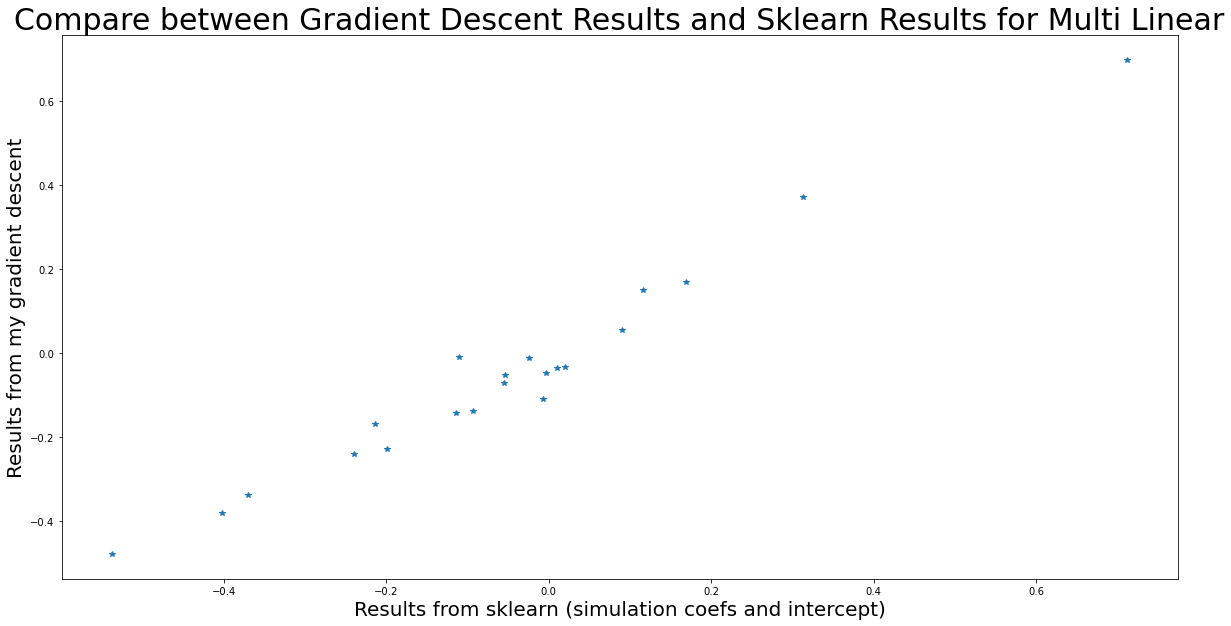

In [16]:
my_reg_coefs_and_intercept=gradient_decent_for_multiple_linear(log_gen_data_x, log_gen_data_y,np.zeros(len(log_gen_data_x[0])+1) ,0.0001, 1000)

reg2 = LinearRegression().fit(log_gen_data_x,log_gen_data_y)
coefs=reg2.coef_
intercept=reg2.intercept_
coefs_and_intercept_by_sklearn = np.insert(coefs,0,intercept)
print("Here is the norm of the difference between my linear regression and the regression result from sklearn")
print(np.linalg.norm(my_reg_coefs_and_intercept-coefs_and_intercept_by_sklearn))

plt.figure(figsize=(20,10))
plt.plot(coefs_and_intercept_by_sklearn, my_reg_coefs_and_intercept, '*')
  
plt.title("Compare between Gradient Descent Results and Sklearn Results for Multi Linear", fontsize=30)

plt.xlabel("Results from sklearn (simulation coefs and intercept)",fontsize=20)
plt.ylabel("Results from my gradient descent",fontsize=20)
plt.show()

Here is the norm of the difference between my linear regression and the regression result from sklearn
1.3164874838804277


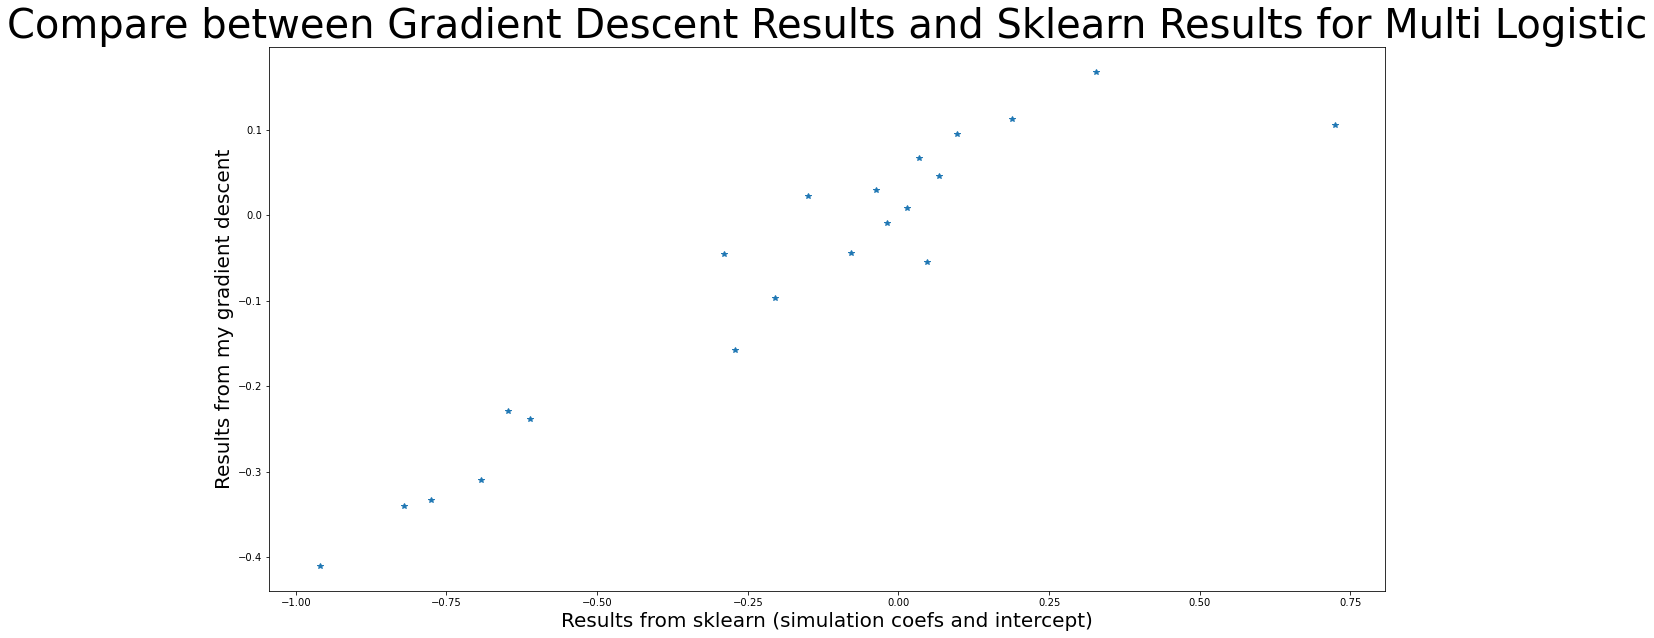

In [17]:
my_reg_coefs_and_intercept2 = gradient_decent_for_multiple_logistic(log_gen_data_x,log_gen_data_y,np.zeros(21),0.000001,100,0.001)

my_reg_coefs_and_intercept2

from sklearn.linear_model import LogisticRegression
reg3 = LogisticRegression().fit(log_gen_data_x,log_gen_data_y)
intercept2=reg3.intercept_
coefs2=reg3.coef_
coefs_and_intercept_by_sklearn2 = np.insert(coefs2,0,intercept2)
print("Here is the norm of the difference between my linear regression and the regression result from sklearn")
print(np.linalg.norm(my_reg_coefs_and_intercept2-coefs_and_intercept_by_sklearn2))


plt.figure(figsize=(20,10))
plt.plot(coefs_and_intercept_by_sklearn2, my_reg_coefs_and_intercept2, '*')
  
plt.title("Compare between Gradient Descent Results and Sklearn Results for Multi Logistic", fontsize=40)

plt.xlabel("Results from sklearn (simulation coefs and intercept)",fontsize=20)
plt.ylabel("Results from my gradient descent",fontsize=20)
plt.show()

My regression seems to have similar output as the sklearn regression.



## Try it out

Here is my data. Instead of finding it, I use the similar way ReadMe did to generate it.

In [18]:
my_log_gen_data_x, my_dump_y = datasets.make_regression(n_samples=110, n_features=2, noise = 1.5)
my_log_gen_data_y = [0 if i>0 else 1 for i in my_dump_y]
temp_framex = pd.DataFrame(my_log_gen_data_x)
temp_framey=pd.DataFrame(my_log_gen_data_y)
temp_frame=pd.concat([temp_framex, temp_framey], ignore_index=True,axis=1)
temp_frame
# I will use the model to predict that given x (a vector with length 2), whether the corresponding y is greater than 0 or less than 0

,0,1,2
0,-0.298358,-3.374085,1
1,-0.477937,-1.032509,1
2,-0.318529,0.127116,1
3,1.327823,1.798811,0
4,-1.735117,-0.281081,1
...,...,...,...
105,-0.899755,0.417719,1
106,-0.593975,-0.918627,1
107,2.664610,-0.384225,0
108,0.339465,-0.244653,0


### 1. First, I will compare dicision tree classifier to my logistic regression

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
print("Dicision Tree Classifier")
dicTreeClassifier = tree.DecisionTreeClassifier()
score_for_dic_tree = cross_val_score(dicTreeClassifier, my_log_gen_data_x, my_log_gen_data_y, cv=10)

print("Here is the mean of the score")
print(score_for_dic_tree.mean())
print("Here is the standard deviation(error) of the score")
print(score_for_dic_tree.std())


Dicision Tree Classifier
Here is the mean of the score
0.9181818181818182
Here is the standard deviation(error) of the score
0.0755147623901643


In [20]:
# Here I wrote my version of ten_fold_validation for my gradient_descent on multiple logistic regression. It is hard-coded according to my data.

def natural_p(x,coef):
    y = coef[0]
    for i in range(0,len(x)):
        y = y + x[i]*coef[i+1]
    return y

def logi_p(p):
    return np.exp(p)/(1+np.exp(p))

X=my_log_gen_data_x
y=np.array(my_log_gen_data_y)

scores = []
folding = KFold(n_splits=10)
for train_index, test_index in folding.split(X):
    #print(y[train_index])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c = gradient_decent_for_multiple_logistic(my_log_gen_data_x,my_log_gen_data_y,np.zeros(3),0.000001,100,0.001)
    temp = []
    for i in range(0,11):
        log = logi_p(natural_p(X_test[i],c))
        if log < 0.5:
            temp.append(0)
        else:
            temp.append(1)
    score = 0
    for i in range(0,11):
        if y_test[i]==temp[i]:
            score = score+ 1/11
    scores.append(score)
    
print("My Logistic Regression")
array_for_logistic = np.array(scores)
print("Here is the mean of the score")
print(array_for_logistic.mean())
print("Here is the standard deviation(error) of the score")
print(array_for_logistic.std())

My Logistic Regression
Here is the mean of the score
0.9545454545454548
Here is the standard deviation(error) of the score
0.04545454545454547


My gradient descent on logistic regression has 99% accuracy on my dataset with standard deviation of 0.0272727.

In [21]:
# Here is the paired t-test between the score from classification tree and my logistic regression
from scipy import stats
stats.ttest_rel(score_for_dic_tree,array_for_logistic)

Ttest_relResult(statistic=-1.5000000000000087, pvalue=0.16785065605707256)

The p-value is 0.17 > 0.05, I fail to reject the null hypothesis, which means the score from classification tree and my logistic regression in ten fold validation are the same.

### 2. Second, I will compare kNN classifier with n_neighbor=3 to my logistic regression

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
# I just pick n_neighbor = 3 since it is a very common one. Actually, if n_neighbors = 2,4,5 or other neighbor, there will be samilar outcome
score_for_kNN = cross_val_score(neigh, my_log_gen_data_x, my_log_gen_data_y, cv=10)
print("kNN classifier")
print("Here is the mean of the score")
print(score_for_kNN.mean())
print("Here is the standard deviation(error) of the score")
print(score_for_kNN.std())

kNN classifier
Here is the mean of the score
0.9181818181818182
Here is the standard deviation(error) of the score
0.07551476239016432


In [23]:
stats.ttest_rel(score_for_kNN,array_for_logistic)

Ttest_relResult(statistic=-1.500000000000009, pvalue=0.16785065605707242)

The p-value is 0.17 > 0.05, I fail to reject the null hypothesis, which means the score from k-NN model and my logistic regression in ten fold validation are the same.